In [1]:
import openai
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from openai.embeddings_utils import cosine_similarity
from openai.embeddings_utils import get_embedding

In [14]:
df = pd.read_csv("EpicCustom.csv", names = ["Material" ,"Category", "Unit", "Embodied Carbon", "Density", "Common_use" , "Comment", "null"], skiprows=1)
df.head(10) 

,Material,Category,Unit,Embodied Carbon,Density,Common_use,Comment,null
0,Concrete block,Concrete and Plaster Products,kg,0.24,1400.0,"External walls, internal walls,landscaping",Concrete blocks (also known as concrete masonr...,NaN
1,Cement mortar,Concrete and Plaster Products,kg,0.35,1858.0,"Bonding masonry walls, pointing, render","Cement mortar contains Portland cement, sand a...",NaN
2,Portland cement,Concrete and Plaster Products,kg,1.30,1500.0,"Concrete, fibre cement sheet, fibre\r\ncement ...",Portland cement (also known as common or gener...,NaN
3,Autoclaved aerated concrete (AAC),Concrete and Plaster Products,kg,0.71,550.0,"External walls, internal walls, floors","Autoclaved Aerated Concrete, also known as AAC...",NaN
4,Concrete 20 Mpa,Concrete and Plaster Products,m³,328.00,NaN,"Floor slabs, suspended slabs,\r\ndriveways, pr...",Concrete is one of the most commonly used cons...,NaN
5,Concrete 25 MPa,Concrete and Plaster Products,m³,361.00,NaN,"Floor slabs, suspended slabs,\r\ndriveways, pr...",Concrete 25 MPa is commonly\r\nused in domesti...,NaN
6,Concrete 32 MPa,Concrete and Plaster Products,m³,416.00,NaN,"Floor slabs, suspended slabs,\r\nprecast wall ...",Concrete 32 MPa is commonly\r\nused in commerc...,NaN
7,Concrete 40 MPa,Concrete and Plaster Products,m³,497.00,NaN,"Structural beams, structural\r\ncolumns, in si...",Concrete 40 MPa is commonly\r\nused in commerc...,NaN
8,Concrete 50 MPa,Concrete and Plaster Products,m³,600.00,NaN,"Structural beams, structural\r\ncolumns, in si...",Concrete 50 MPa is commonly\r\nused in commerc...,NaN
9,Fibre cement weatherboard,Fibre cement,kg,2.20,1445.0,External wall cladding,Fibre cement weatherboards are used as an exte...,NaN


In [15]:
df["combined"] = (
    "Material: " + df.Material.str.strip() + "; Category: " + df.Category.str.strip()  + "; Common_use: " + df.Common_use.str.strip()+ "; Comment: " + df.Comment.str.strip()
)
df.head()

,Material,Category,Unit,Embodied Carbon,Density,Common_use,Comment,null,combined
0,Concrete block,Concrete and Plaster Products,kg,0.24,1400.0,"External walls, internal walls,landscaping",Concrete blocks (also known as concrete masonr...,NaN,Material: Concrete block; Category: Concrete a...
1,Cement mortar,Concrete and Plaster Products,kg,0.35,1858.0,"Bonding masonry walls, pointing, render","Cement mortar contains Portland cement, sand a...",NaN,Material: Cement mortar; Category: Concrete an...
2,Portland cement,Concrete and Plaster Products,kg,1.30,1500.0,"Concrete, fibre cement sheet, fibre\r\ncement ...",Portland cement (also known as common or gener...,NaN,Material: Portland cement; Category: Concrete ...
3,Autoclaved aerated concrete (AAC),Concrete and Plaster Products,kg,0.71,550.0,"External walls, internal walls, floors","Autoclaved Aerated Concrete, also known as AAC...",NaN,Material: Autoclaved aerated concrete (AAC); C...
4,Concrete 20 Mpa,Concrete and Plaster Products,m³,328.00,NaN,"Floor slabs, suspended slabs,\r\ndriveways, pr...",Concrete is one of the most commonly used cons...,NaN,Material: Concrete 20 Mpa; Category: Concrete ...


In [4]:
df['embeddings'] = df.combined.apply(lambda x: get_embedding(x, engine="text-embedding-ada-002"))
df.to_csv('customdata_embeddings.csv')

In [16]:
df_test = pd.read_csv('customdata_embeddings.csv')
df_test['embeddings'] = df_test['embeddings'].apply(eval).apply(np.array)
df_test

,Unnamed: 0,Material,Category,Unit,Embodied Carbon,Density,Common_use,Comment,null,combined,embeddings
0,0,Concrete block,Concrete and Plaster Products,kg,0.24,1400.0,"External walls, internal walls,landscaping",Concrete blocks (also known as concrete masonr...,NaN,Material: Concrete block; Category: Concrete a...,"[-0.008006377145648003, 0.02301170490682125, -..."
1,1,Cement mortar,Concrete and Plaster Products,kg,0.35,1858.0,"Bonding masonry walls, pointing, render","Cement mortar contains Portland cement, sand a...",NaN,Material: Cement mortar; Category: Concrete an...,"[-0.0013364371843636036, 0.03583025932312012, ..."
2,2,Portland cement,Concrete and Plaster Products,kg,1.30,1500.0,"Concrete, fibre cement sheet, fibre\r\ncement ...",Portland cement (also known as common or gener...,NaN,Material: Portland cement; Category: Concrete ...,"[-1.9533988961484283e-05, 0.03607768565416336,..."
3,3,Autoclaved aerated concrete (AAC),Concrete and Plaster Products,kg,0.71,550.0,"External walls, internal walls, floors","Autoclaved Aerated Concrete, also known as AAC...",NaN,Material: Autoclaved aerated concrete (AAC); C...,"[0.0019136698683723807, 0.029541542753577232, ..."
4,4,Concrete 20 Mpa,Concrete and Plaster Products,m³,328.00,NaN,"Floor slabs, suspended slabs,\r\ndriveways, pr...",Concrete is one of the most commonly used cons...,NaN,Material: Concrete 20 Mpa; Category: Concrete ...,"[0.003653560532256961, 0.024165596812963486, -..."
...,...,...,...,...,...,...,...,...,...,...,...
99,99,Plywood,Manufactured timber product,m³,3680.00,NaN,"Timber sheets, interior joinery,\r\nwalling, f...","Plywood is available in a variety of grades, a...",NaN,Material: Plywood; Category: Manufactured timb...,"[0.004166542086750269, 0.007531571201980114, -..."
100,100,Plywood outdoor,Manufactured timber product,m³,1777.00,NaN,"Timber sheets, interior joinery,\r\nwalling, f...","variations of plywood, outdoor uses",NaN,Material: Plywood outdoor; Category: Manufactu...,"[0.007230393122881651, 0.011213405057787895, -..."
101,101,Structural insulated panel (SIP),Manufactured timber product,m²,135.00,NaN,"Floor structure, external walls,\r\ninternal w...",SIPs can be used as wall or roof panels and ar...,NaN,Material: Structural insulated panel (SIP); Ca...,"[-0.004386466927826405, 0.013774576596915722, ..."
102,102,Softwood,Softwood,m³,549.00,NaN,"Beams, columns, framing, joinery,\r\nflooring,...",Softwood generally has a lower density and bet...,NaN,Material: Softwood; Category: Softwood; Common...,"[0.00818959716707468, -0.0024176735896617174, ..."


In [32]:
search_term_epic = input('Enter a search term: ')

In [33]:
search_term_vector_epic = get_embedding(search_term_epic, engine='text-embedding-ada-002')
df_test['similarities'] = df_test['embeddings'].apply(lambda x: cosine_similarity(x, search_term_vector_epic))
df_test.sort_values("similarities", ascending=False).head(10)

,Unnamed: 0,Material,Category,Unit,Embodied Carbon,Density,Common_use,Comment,null,combined,embeddings,similarities
91,91,Cross laminated timber (CLT),Manufactured timber product,m³,645.0,NaN,"Flooring and walling system,\r\nstructural pan...",CLT has different structural capabilities when...,NaN,Material: Cross laminated timber (CLT); Catego...,"[-0.005103772040456533, 0.016039477661252022, ...",0.776531
92,92,Glued laminated timber (glulam),Manufactured timber product,m³,1718.0,NaN,"Structural members, columns,\r\nrafters, truss...",Glulam can be used for long structural members...,NaN,Material: Glued laminated timber (glulam); Cat...,"[-0.014674335718154907, 0.018405772745609283, ...",0.768496
87,87,Cork slab,Cork,kg,9.5,120.0,"Insulation, floor tiles, wall tiles,\r\nexteri...",Cork slab products are typically available as ...,NaN,Material: Cork slab; Category: Cork; Common_us...,"[0.007740996312350035, 0.011278584599494934, -...",0.761126
94,94,Laminated veneer lumber (LVL),Manufactured timber product,m³,1059.0,NaN,"Long spanning structural members,\r\nlintels, ...",LVL members are excellent for long spanning st...,NaN,Material: Laminated veneer lumber (LVL); Categ...,"[-0.005538307595998049, 0.01487701665610075, -...",0.759838
72,72,Linoleum,Other polymers,kg,4.4,1200.0,Flooring,Linoleum is a composite material used for floo...,NaN,Material: Linoleum; Category: Other polymers; ...,"[-0.0007741256849840283, 0.013926035724580288,...",0.754085
93,93,Glulam outdoor,Manufactured timber product,m³,1605.0,NaN,"Structural members, columns,\r\nrafters, truss...","Variations of Glulam, for outdoor uses",NaN,Material: Glulam outdoor; Category: Manufactur...,"[0.0001541043457109481, 0.006188996136188507, ...",0.752576
16,16,Laminated glass,Laminated glass,kg,2.8,2600.0,"Windows, doors, partitions,\r\nskylights, ball...","Laminated glass is commonly used for windows, ...",NaN,Material: Laminated glass; Category: Laminated...,"[0.0075194272212684155, 0.018152160570025444, ...",0.751478
89,89,Hardwood kiln-dried - dressed,Hardwood,m³,2269.0,NaN,"flooring, walling, furniture, cladding,\r\ndoo...",variations of hardwood - dressed,NaN,Material: Hardwood kiln-dried - dressed; Categ...,"[0.007425903808325529, 0.011395039036870003, -...",0.750237
98,98,Particleboard outdoor,Manufactured timber product,m³,813.0,NaN,outdoor walling flooring,"variations of particleboard, but for outdoor uses",NaN,Material: Particleboard outdoor; Category: Man...,"[0.003860882017761469, 0.01198767963796854, -0...",0.749360
50,50,"Woven carpet, nylon - average",Carpet,m²,23.9,NaN,Residential and commercial flooring,Variation of nylon carpet,NaN,"Material: Woven carpet, nylon - average; Categ...","[-0.004741700831800699, 0.00192433746997267, -...",0.748153


In [36]:
highest_similarity = df_test['similarities'].max()
if highest_similarity >= 0.75:
    fact_with_highest_similarity = df_test.loc[df_test['similarities'] == highest_similarity, 'Material']
    print(fact_with_highest_similarity)
    response = openai.Completion.create(
        model='davinci:ft-personal-2023-08-01-13-10-00',
        prompt=search_term_epic,
        max_tokens=30,
        temperature=0
    )
    content = response['choices'][0]['text'].replace('\n', '')
    print(content)
else:
    response = openai.Completion.create(
        model='davinci:ft-personal-2023-08-01-13-10-00',
        prompt=search_term_epic,
        max_tokens=30,
        temperature=0
    )
    content = response['choices'][0]['text'].replace('\n', '')
    print(content)



91    Cross laminated timber (CLT)
Name: Material, dtype: object
 Flooring? -> The standarized name of COX - LAM - Laminate Flooring is Laminate flooring - 6 mm. What


In [9]:
def search_materials(df_test, material_description, n=5, pprint=True):
    material_embedding = get_embedding(
        material_description,
        engine="text-embedding-ada-002"
    )
    df_test["similarities"] = df_test.embeddings.apply(lambda x: cosine_similarity(x, material_embedding))

    results = (
        df_test.sort_values("similarities", ascending=False)
        .head(n)
        .loc[:, "Material"] #<--- how to get two columns and return everything
    )
    if pprint:
        for r in results:
            print(r)
            print()
    return results

In [10]:
results = search_materials(df_test, "Stud Wall", n=5)

Concrete block

Plasterboard - 10 mm

Structural insulated panel (SIP)

Wallpaper - per m²

Particleboard outdoor



In [11]:
# import tkinter as tk
# import openai

# def on_submit():
#    # Get the prompt from the input field
#    prompt = search_term_epic


#    # Make the completion request
#    completion = search_materials(df_test, prompt, n=5, pprint=True)


#    # Clear the input field
#    input_field.delete(0, "end")


#    # Get the completion text from the first choice in the choices list
#    text = completion["text"]


#    # Display the completion in the result text area
#    result_text.config(state="normal")
#    result_text.delete("1.0", "end")
#    result_text.insert("end", text)
#    result_text.config(state="disabled")


# # Create the main window
# window = tk.Tk()
# window.title("Put in a material")


# # Create the input field and submit button
# input_field = tk.Entry(window)
# submit_button = tk.Button(window, text="Submit", command=on_submit)


# # Create the result text area
# result_text = tk.Text(window, state="normal", width=80, height=20)


# # Add the input field, submit button, and result text area to the window
# input_field.pack()
# submit_button.pack()
# result_text.pack()


# # Run the main loop
# window.mainloop()


In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.manifold import TSNE

# Load the embeddings
df_epic_em = pd.read_csv('customdata_embeddings.csv')

# Convert to a list of lists of floats
matrix = np.array(df_epic_em.embeddings.apply(eval).to_list())

# Create a t-SNE model and transform the data
tsne = TSNE(n_components=2, perplexity=15, random_state=42, init='random', learning_rate=200)
vis_dims = tsne.fit_transform(matrix)

# Define the categories and their respective colors
categories = df_epic_em['category'].unique()
colors = ["red", "darkorange", "gold", "turquoise", "darkgreen"]

# Extract the x and y coordinates from the t-SNE result
x = [coord[0] for coord in vis_dims]
y = [coord[1] for coord in vis_dims]

# Get the color indices for each point
color_indices = df_epic_em.category.astype('category').cat.codes

# Create a colormap based on the categories and colors
colormap = mcolors.ListedColormap(colors)

# Scatter plot with category colors
plt.scatter(x, y, c=color_indices, cmap=colormap, alpha=0.3)

# Plot markers for each category
for score, color in enumerate(colors):
    avg_x = df_epic_em[df_epic_em.category == categories[score]]['embeddings'].apply(eval).apply(lambda x: x[0]).mean()
    avg_y = df_epic_em[df_epic_em.category == categories[score]]['embeddings'].apply(eval).apply(lambda x: x[1]).mean()
    plt.scatter(avg_x, avg_y, marker='x', color=color, s=100, label=categories[score])

# Add legend
plt.legend(title='Categories', loc='upper right')

plt.title("Material Categories visualized using t-SNE")
plt.show()

TypeError: data type 'Category' not understood

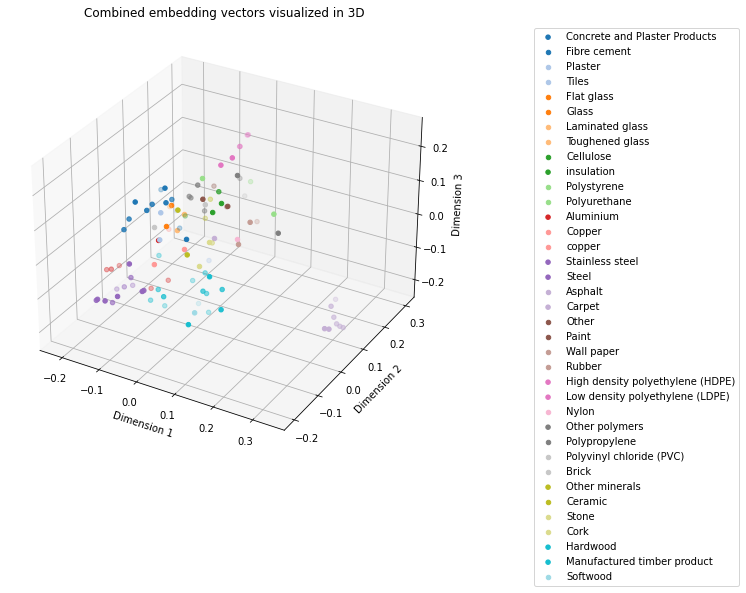

In [13]:
import pandas as pd
from openai.embeddings_utils import get_embeddings
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Load your material dataset
csv_path = "customdata_embeddings.csv"
material_data = pd.read_csv(csv_path)

# Query embeddings for your material data
text_data = material_data["combined"].tolist()
matrix = get_embeddings(text_data, engine="text-embedding-ada-002")

# Reduce the embedding dimensionality
pca = PCA(n_components=3)
vis_dims = pca.fit_transform(matrix)
material_data["embed_vis"] = vis_dims.tolist()

# Increase the figure size for a larger graph
fig = plt.figure(figsize=(12, 8))  # Adjust the figsize as needed
ax = fig.add_subplot(111, projection='3d')

cmap = plt.get_cmap("tab20")
unique_categories = material_data["Category"].unique()

# Plot each category individually
for i, category in enumerate(unique_categories):
    sub_matrix = np.array(material_data[material_data["Category"] == category]["embed_vis"].to_list())
    x = sub_matrix[:, 0]
    y = sub_matrix[:, 1]
    z = sub_matrix[:, 2]
    colors = [cmap(i / len(unique_categories))] * len(sub_matrix)
    ax.scatter(x, y, z, c=colors, label=category)

ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')

# Move the legend outside the plot
ax.legend(loc='upper left', bbox_to_anchor=(1.2, 1))

plt.title("Combined embedding vectors visualized in 3D")
plt.show()
